In [166]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [167]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit import *
from qiskit.extensions import RXGate, XGate, CXGate

In [168]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.x(1)
circ.h(1)

In [169]:
oracleType, oracleValue = np.random.randint(4), np.random.randint(4)

In [170]:
while oracleType == 0:
    oracleType, oracleValue = np.random.randint(4), np.random.randint(4)
oracle_stuff = np.random.randint(1,2)

In [171]:
circ.barrier()

In [172]:
circ.cx(0,1)

In [173]:
circ.barrier()

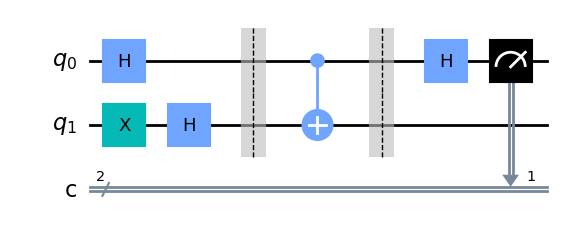

In [174]:
circ.h(0)
circ.measure(0,1)
circ.draw('mpl')

In [175]:
backend = Aer.get_backend('statevector_simulator')

In [176]:
job = backend.run(circ)

In [177]:
result = job.result()

In [178]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

Statevector([ 0.   +0.j,  0.707-0.j,  0.   +0.j, -0.707+0.j],
            dims=(2, 2))


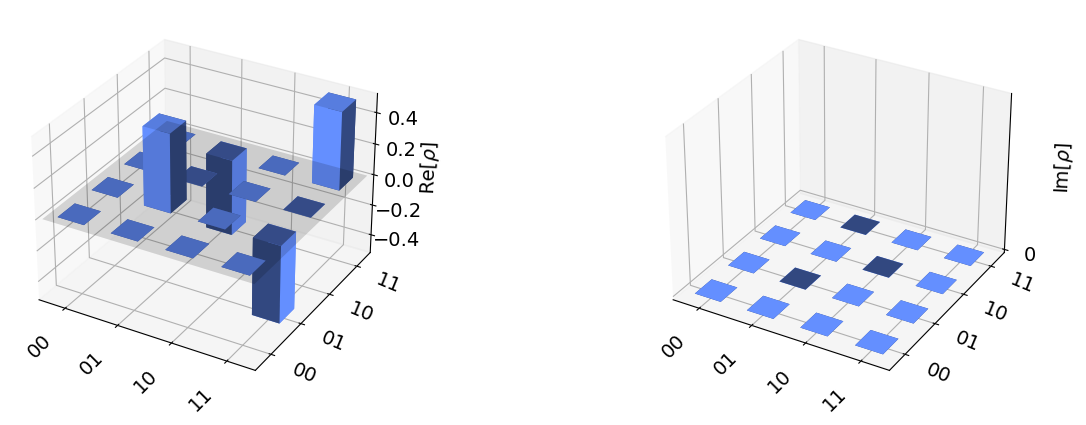

In [179]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [180]:
from qiskit.visualization import plot_state_qsphere
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(circ, backend)).result()
psi  = result.get_statevector(circ)

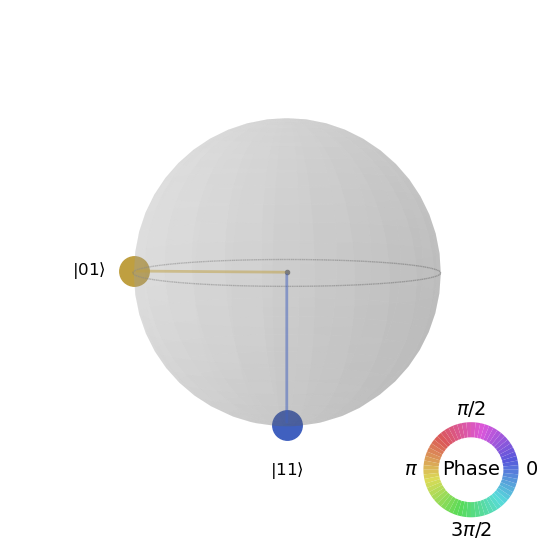

In [181]:
plot_state_qsphere(psi)

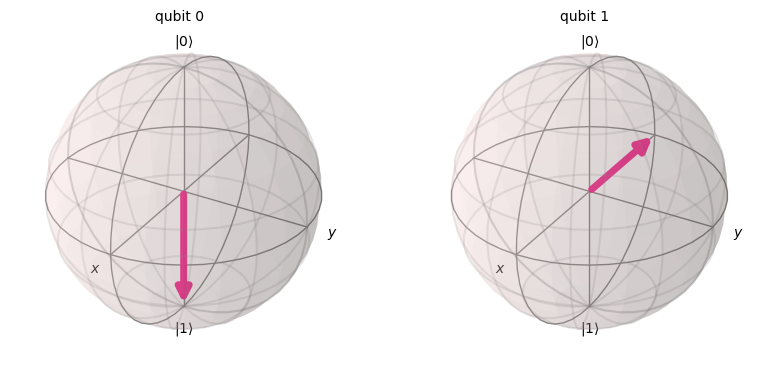

In [182]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

In [183]:
n = 5
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
Circuit = QuantumCircuit(qr, cr)

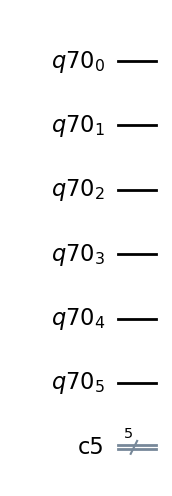

In [184]:
Circuit.draw('mpl')

In [185]:
for i in range(n):
    Circuit.h(qr[i])
Circuit.x(qr[n])
Circuit.h(qr[n])
Circuit.barrier()

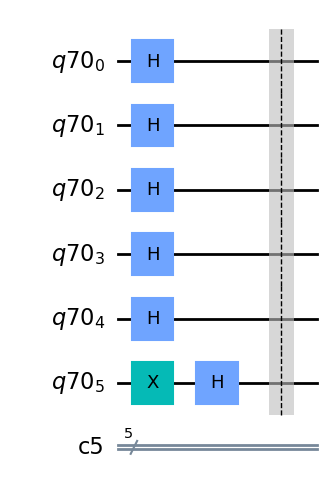

In [186]:
Circuit.draw('mpl')

In [187]:
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import random_unitary

for qubit in range(n):
    Circuit.cx(qubit, n)

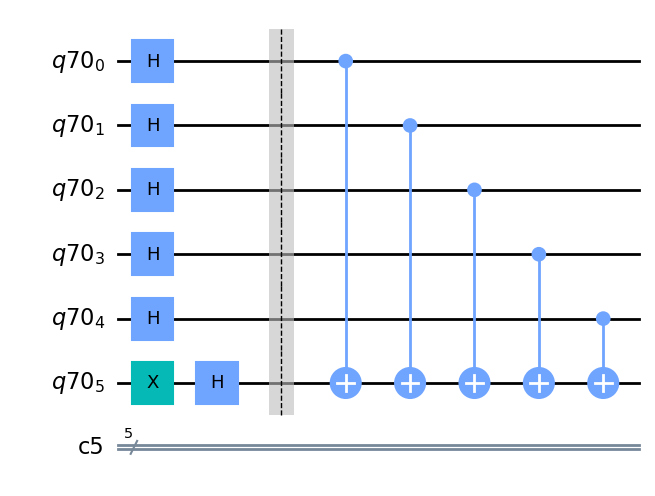

In [188]:
Circuit.draw('mpl')

In [189]:
Circuit.barrier()
for i in range(n):
    Circuit.h(qr[i])
Circuit.barrier()

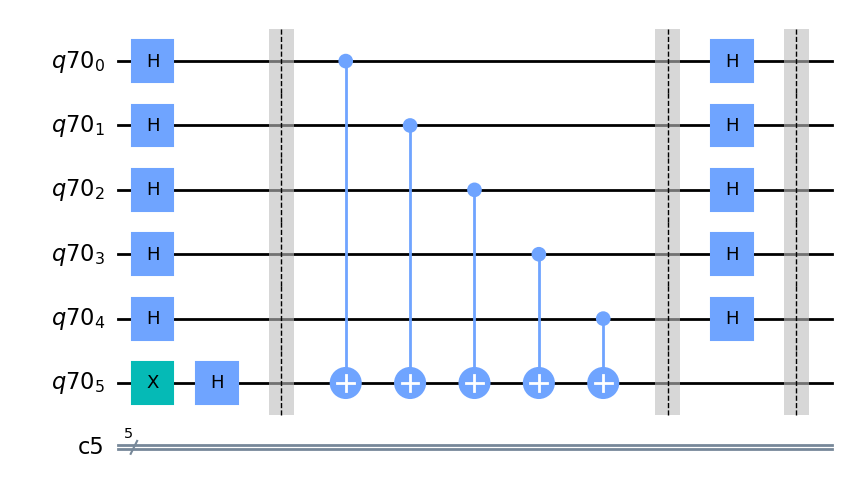

In [190]:
Circuit.draw('mpl')

In [191]:
for i in range(n):
    Circuit.measure(qr[i], cr[i])

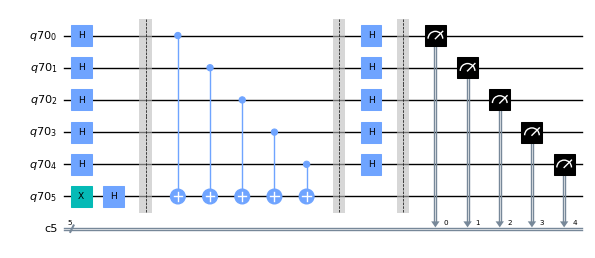

In [192]:
Circuit.draw('mpl',scale=0.5)

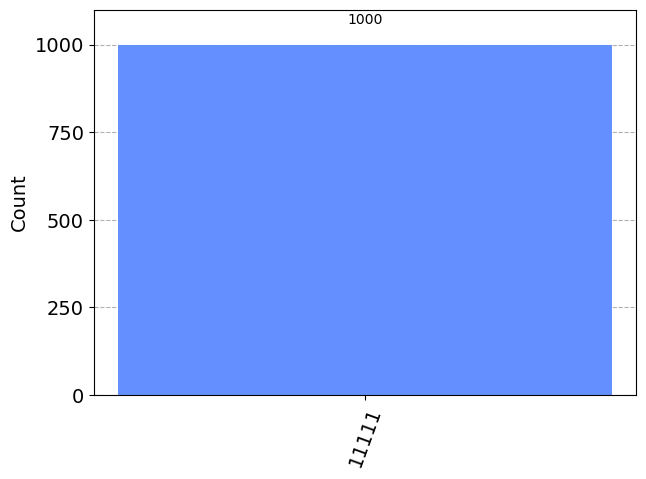

In [193]:
from qiskit.tools.visualization import plot_histogram
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
job = execute(Circuit, backend=backend, shots=shots)
results = job.result() 
answer = results.get_counts()

plot_histogram(answer)

In [194]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(Circuit)
result = job.result()

In [195]:
outputstate_1 = result.get_statevector(Circuit, decimals=3)
print(outputstate)

Statevector([ 0.   +0.j,  0.707-0.j,  0.   +0.j, -0.707+0.j],
            dims=(2, 2))


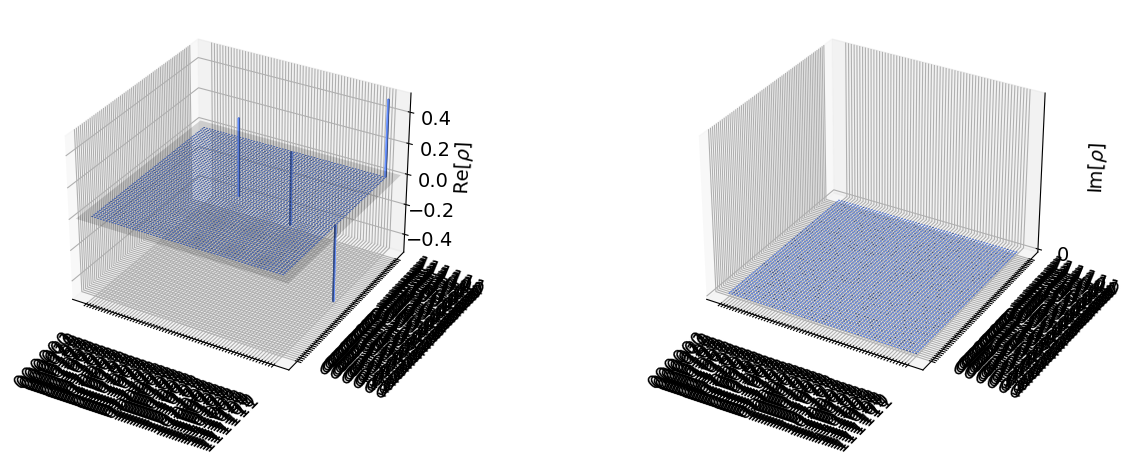

In [196]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate_1)

In [197]:
from qiskit.visualization import plot_state_qsphere
result = backend.run(transpile(Circuit, backend)).result()
psi_1  = result.get_statevector(Circuit)

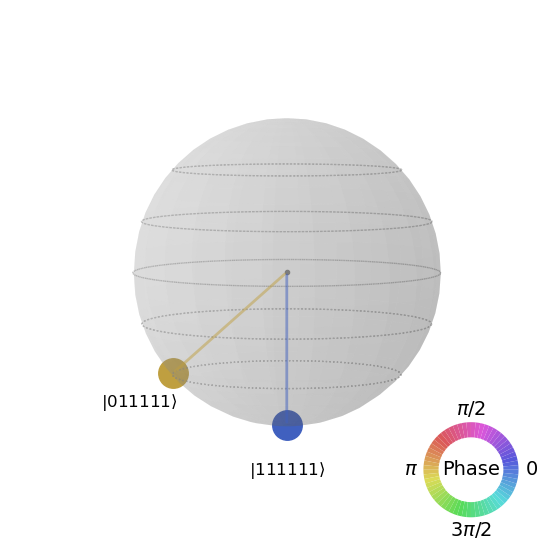

In [198]:
plot_state_qsphere(psi_1)

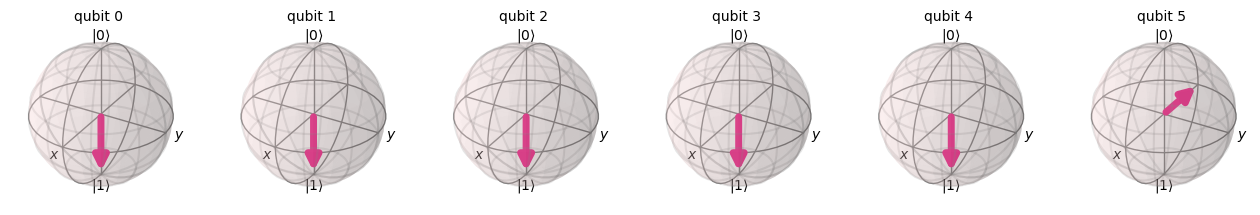

In [199]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi_1)